# Dog or Coyote?

## Purpose

The purpose of this notebook is to take random images of dogs and coyotes and train the computer to be able to tell the difference.

We will be exposed to deep learning concepts. Python libraries that are new to us are tensorflow and keras for executing these models.

# Preparing the data sets

In [32]:
#import libraries

import numpy as np
import pandas as pd
import os
import random 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization



In [15]:
#importing data from files and giving them variables

train_data = "./train"
test_data = "./test"

img_width = 150
img_height = 150

In [16]:

#Create dataframe of train data set 
filenames = os.listdir("./train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

dog_coy_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Data Exploration

## Print first and last rows of data

First we will look at a piece of the training data to see make sure we know what our data looks like. Our dataframe has one column with the filename, and one column that labels the image as a 1(dog) or a 0(coyote). 

In [17]:
#print first of dataframe

dog_coy_df.head()

,filename,category
0,dog.8011.jpg,1
1,dog.7322.jpg,1
2,dog.1753.jpg,1
3,dog.5535.jpg,1
4,dog.3144.jpg,1


In [18]:
#print last 5 rows of dataframe

dog_coy_df.tail()

,filename,category
13450,dog.6025.jpg,1
13451,dog.8008.jpg,1
13452,dog.1992.jpg,1
13453,dog.12412.jpg,1
13454,image1217.png,0


## Visualize the number of dog images vs coyotes

We know that there are more dog than coyote images. 
But lets just take a look at the difference is so we can better understand our data.
Having such a larger amount of dog images is not ideal, but we will continue on with what we have. 
Still, we want to keep that fact in mind, and be aware of it.

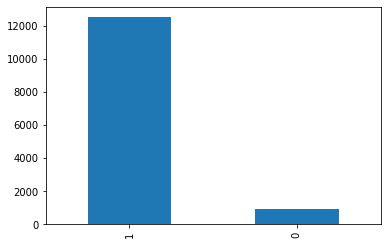

In [19]:

#Print plot with category values, Dogs: 1 Coyotes: 0

dog_coy_df['category'].value_counts().plot.bar()


## Show random sample of data

Showing a random sample of the data is helpful because it can tell us more about our data besides the fact there are dogs and coyotes in them. Sometimes the data has characteristics we woud not normally think about. For example, some images have humans in them, multiple dogs or coyotes, or fences and gates. It is good to keep these things in mind when creating a model for our data. 

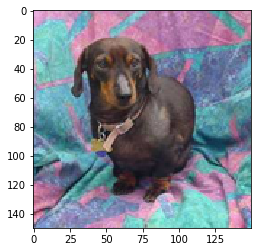

In [28]:
#showing random sample of images

sample = random.choice(filenames)
image = load_img("./train/"+sample)
new_image = image.resize((img_width, img_height))
plt.imshow(new_image)
        
                         

# Train Model

This is where we process images and do a bunch of training stuff that I dont understand yet.

In [30]:


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)       

# Overfitting Refinement

In [33]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

# Validation